In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import tree
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_score, recall_score, precision_recall_curve

In [2]:
df = pd.read_csv('df_total.csv', skiprows=0, low_memory=False)
df = df.drop(columns = ['NU_IDADE_N'])

In [3]:
df

,SG_UF,CRITERIO,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,CHIK
0,12,Laboratorial,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,12,Laboratorial,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,12,Laboratorial,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0
3,12,EpiClinico,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,12,EpiClinico,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747829,17,Laboratorial,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4747830,17,Laboratorial,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
4747831,17,Laboratorial,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1
4747832,17,EpiClinico,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4]:
df = pd.concat([pd.get_dummies(df['SG_UF']), df], axis = 1)

In [5]:
df_lab = df[df['CRITERIO'] == 'Laboratorial']
df_lab = df_lab.reset_index(drop = True)
df_epi = df[df['CRITERIO'] == 'EpiClinico']
df_epi = df_epi.reset_index(drop = True)
df_lab = df_lab.drop(columns = ['CRITERIO'])
df_epi = df_epi.drop(columns = ['CRITERIO'])

In [6]:
df_lab = df_lab.drop_duplicates()

In [7]:
df_epi.columns

Index([          11,           12,           13,           14,           15,
                 16,           17,           21,           22,           23,
                 24,           25,           26,           27,           28,
                 29,           31,           32,           33,           35,
                 41,           42,           43,           50,           51,
                 52,           53,      'SG_UF',      'FEBRE',    'MIALGIA',
         'CEFALEIA',   'EXANTEMA',     'VOMITO',     'NAUSEA', 'DOR_COSTAS',
       'CONJUNTVIT',    'ARTRITE',  'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
             'LACO',  'DOR_RETRO',       'CHIK'],
      dtype='object')

In [8]:
df_epi.columns[0:42]

Index([          11,           12,           13,           14,           15,
                 16,           17,           21,           22,           23,
                 24,           25,           26,           27,           28,
                 29,           31,           32,           33,           35,
                 41,           42,           43,           50,           51,
                 52,           53,      'SG_UF',      'FEBRE',    'MIALGIA',
         'CEFALEIA',   'EXANTEMA',     'VOMITO',     'NAUSEA', 'DOR_COSTAS',
       'CONJUNTVIT',    'ARTRITE',  'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
             'LACO',  'DOR_RETRO'],
      dtype='object')

In [9]:
df_lab.columns = df_lab.columns.astype(str)
df_epi.columns = df_epi.columns.astype(str)

In [10]:
X = df_lab.iloc[:,0:42]
y = df_lab.iloc[:,42]
stratify_col = X['SG_UF'].astype(str) + "_" + pd.Series(y).astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify_col, test_size = 0.4, random_state = 0)
#stratify_col = X_test['SG_UF'].astype(str) + "_" + pd.Series(y_test).astype(str)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, stratify = stratify_col, test_size = 0.5, random_state = 0)

In [11]:
X_train = X_train.drop(columns = ['SG_UF', 'FEBRE', 'CEFALEIA', 'MIALGIA'])
X_test = X_test.drop(columns = ['SG_UF', 'FEBRE', 'CEFALEIA', 'MIALGIA'])

In [12]:
print('Train: ', y_train.shape, sum(y_train == 1), sum(y_train == 0))
print('Test: ', y_test.shape, sum(y_test == 1), sum(y_test == 0))
#print('Validation: ', y_val.shape, sum(y_val == 1), sum(y_val == 0))

Train:  (30216,) 5244 24972
Test:  (20145,) 3497 16648


### Random Forest

In [13]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train ,y_train)

RandomForestClassifier(random_state=0)

In [14]:
y_pred_train = rfc.predict_proba(X_train)[:,1]
fpr_2, tpr_2, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1)
print(roc_auc_score(y_train, y_pred_train))

0.91629682070769


<BarContainer object of 38 artists>

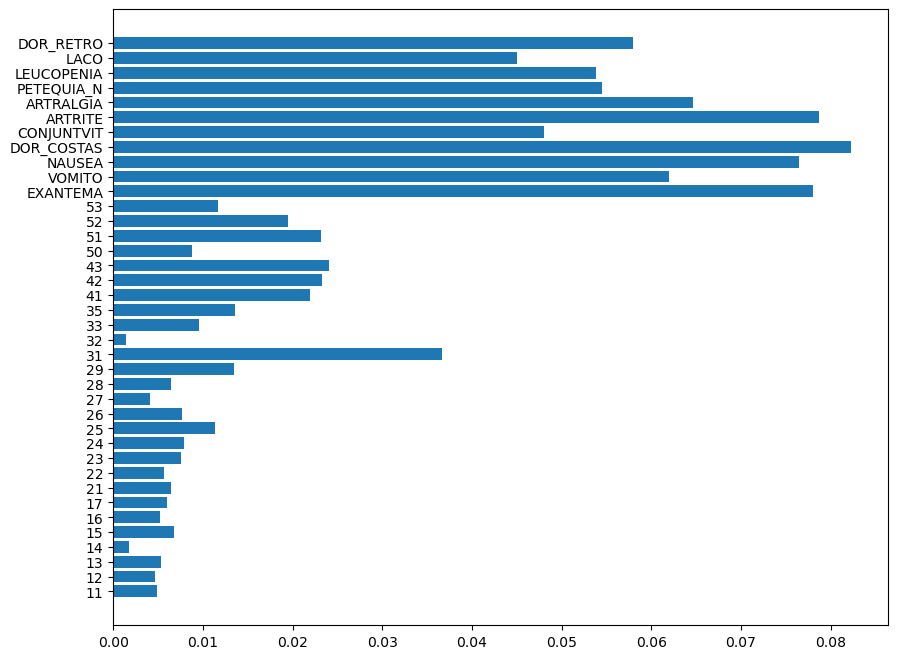

In [15]:
plt.figure(figsize = (10,8))
plt.barh(X_train.columns, rfc.feature_importances_)

### Randomized Search for RF

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 20)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Balanced weights
class_types = [None, 'balanced']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'criterion': ['gini', 'entropy', 'log_loss'],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'class_weight': class_types
               }

In [17]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                               param_distributions = random_grid,
                               n_iter = 100,
                               scoring = 'roc_auc',
                               cv = 3,
                               verbose=3,
                               random_state=0,
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_estimator_

In [ ]:
rf_random.best_score_

### XGBoost

In [ ]:
# Number of trees in random forest
eta = [0.001, 0.01, 0.1]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'eta': eta,
               'max_depth': max_depth,
               }

In [ ]:
rf_random = RandomizedSearchCV(estimator = XGBClassifier(nthread = 8),
                               param_distributions = random_grid,
                               n_iter = 100,
                               scoring = 'roc_auc',
                               cv = 5,
                               verbose=3,
                               random_state=0,
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_score_

In [ ]:
rf_random.best_estimator_

### Evaluation of Rando Forest

In [ ]:
y_val_pred = rfc.predict(X_train)
y_val_proba = rfc.predict_proba(X_train)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_val_proba, pos_label = 1)
plt.plot(fpr, tpr, '-o', linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

In [ ]:
plt.plot(thresholds, tpr)
plt.plot(thresholds, 1 - fpr)

In [ ]:
np.argmin(abs(tpr-0.94))

In [ ]:
thr_opt = thresholds[1264]

In [ ]:
thr_opt

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
y_pred_final = y_pred_proba.copy()
y_pred_final[y_pred_proba >= thr_opt] = 1
y_pred_final[y_pred_proba < thr_opt] = 0

In [ ]:
confusion_matrix(y_test, y_pred_final)

In [ ]:
roc_auc_score(y_test, y_pred_final)

In [ ]:
y_pred_proba = rfc.predict_proba(X_train)[:,1]
y_pred_final = y_pred_proba.copy()
y_pred_final[y_pred_proba >= thr_opt] = 1
y_pred_final[y_pred_proba < thr_opt] = 0

In [ ]:
confusion_matrix(y_train, y_pred_final)